In [1]:
import torch
print(torch.__version__)

1.3.1


In [3]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import keras
from keras.models import Model
from keras.layers import Input, LSTM, Dense
from keras.models import Sequential, Input, Model
from keras.layers import (Dense, Conv1D, Convolution2D, GRU, LSTM, Recurrent, Bidirectional, TimeDistributed,
                          Dropout, Flatten, RepeatVector, Reshape, MaxPooling1D, UpSampling1D, BatchNormalization)
from keras.layers.core import Lambda
from keras.optimizers import Adam
from keras.regularizers import l1
from keras.models import load_model
from sklearn import preprocessing
from keras.models import load_model
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn import linear_model
import pandas as pd
import torch
import torch.nn as nn
import random
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
from scipy import special
import torchvision.datasets as dsets
import torchvision.transforms as transforms

In [3]:
def function_gen(x, a, b, c, d, e, f, z1, z2, z3, z4, z5, z6, z7, z8, z9, z10, z11, z12):
    y1 = a*(x-z1)**2 + b*(x-z2)**2 + c*(x-z3)**2 + d*(x-z4)**2 + e*(x-z5)**2 + f*(x-z6)**2
    y2 = a*(x+z7)**2 + b*(x+z8)**2 + c*(x+z9)**2 + d*(x+z10)**2+ e*(x+z11)**2+ f*(x+z12)**2
    return y1, y2

$y_1 = a(x-z_1)^2+b(x-z_2)^2+c(x-z_3)^2+d(x-z_4)^2+e(x-z_5)^2+f(x-z_6)^2$

$y_2 = a(x+z_7)^2+b(x+z_8)^2+c(x+z_9)^2+d(x+z_{10})^2+e(x+z_{11})^2+f(x+z_{12})^2$

In [17]:
x = np.linspace(-10,10,100)
y1 = []
y2 = []
a = []
b = []
c = []
d = []
e = []
f = []
z1 = np.random.uniform(0,12)
z2 = np.random.uniform(0,12)
z3 = np.random.uniform(0,12)
z4 = np.random.uniform(0,12)
z5 = np.random.uniform(0,12)
z6 = np.random.uniform(0,12)
z7 = np.random.uniform(0,12)
z8 = np.random.uniform(0,12)
z9 = np.random.uniform(0,12)
z10 = np.random.uniform(0,12)
z11 = np.random.uniform(0,12)
z12 = np.random.uniform(0,12)
    
for k in range(10000):
    a_ = np.random.normal(8, 1, 1)
    b_ = np.random.normal(7, 2, 1)
    c_ = np.random.normal(6, 3, 1)
    d_ = np.random.normal(5, 4, 1)
    e_ = np.random.normal(4, 5, 1)
    f_ = np.random.normal(3, 7, 1)
    y1_, y2_ = function_gen(x, a_, b_, c_, d_,e_,f_,z1,z2,z3,z4,z5,z6,z7,z8,z9,z10,z11,z12)
    y1.append(y1_)
    y2.append(y2_)
    a.append(a_)
    b.append(b_)
    c.append(c_)
    d.append(d_)
    e.append(e_)
    f.append(f_)
        
nor_y1 = preprocessing.normalize(y1)
nor_y2 = preprocessing.normalize(y2)

In [2]:
def s_1(b1, b2, Vbot, C1, D1):
    s1 = (b1+b2)/2 + ((b2-b1)/2)*special.erfc((Vbot-C1)/D1)
    return s1
    
def s_2(b3, b4, Vbot, C2, D2):
    s2 = (b3+b4)/2 + ((b4-b3)/2)*special.erfc((Vbot-C2)/D2)
    return s2

def s_3(b5, b6, Vbot, C3, D3):
    s3 = (b5+b6)/2 + ((b6-b5)/2)*special.erfc((Vbot-C3)/D3)
    return s3

def s_4(b7, b8, Vtop, C4, D4):
    s4 = (b7+b8)/2 + ((b8-b7)/2)*special.erfc((Vtop-C4)/D4)
    return s4

def s_5(b9, b10, Vtop, C5, D5):
    s5 = (b9+b10)/2 + ((b10-b9)/2)*special.erfc((Vtop-C5)/D5)
    return s5

def s_6(b11, b12, Vtop, C6, D6):
    s6 = (b11+b12)/2 + ((b12-b11)/2)*special.erfc((Vtop-C6)/D6)
    return s6

In [3]:
def F_1(a1, a2, a3, a4, a7, Al1, Al2, Al3, s1, s2, s3, Vbot):
    F1 = a1+(a2-a1)*(special.erfc((Vbot+Al1)/s1)+1)/2 + (a3-a2)*(special.erfc((Vbot+Al2)/s2)+1)/2 + (a4-a3)*(special.erfc((Vbot+Al3)/s3)+1)/2 + a7*Vbot
    return F1

def F_2(a1, a5, a6, a4, a7, Au1, Au2, Au3, s4, s5, s6, Vtop):
    F2 = a1+(a5-a1)*(special.erfc((Vtop+Au1)/s4)+1)/2 + (a6-a5)*(special.erfc((Vtop+Au2)/s5)+1)/2 + (a4-a6)*(special.erfc((Vtop+Au3)/s6)+1)/2 + a7*Vtop
    return F2
    
    
    

In [269]:
def s_1(b1, b2, Vbot, C1, D1):
    s1 = (b1+b2)/2 + ((b2-b1)/2)*special.erfc((Vbot-C1)/D1)
    return s1
    
def s_2(b3, b4, Vbot, C2, D2):
    s2 = (b3+b4)/2 + ((b4-b3)/2)*special.erfc((Vbot-C2)/D2)
    return s2

def s_3(b5, b6, Vbot, C3, D3):
    s3 = (b5+b6)/2 + ((b6-b5)/2)*special.erfc((Vbot-C3)/D3)
    return s3

def s_4(b7, b8, Vtop, C4, D4):
    s4 = (b7+b8)/2 + ((b8-b7)/2)*special.erfc((Vtop-C4)/D4)
    return s4

def s_5(b9, b10, Vtop, C5, D5):
    s5 = (b9+b10)/2 + ((b10-b9)/2)*special.erfc((Vtop-C5)/D5)
    return s5

def s_6(b11, b12, Vtop, C6, D6):
    s6 = (b11+b12)/2 + ((b12-b11)/2)*special.erfc((Vtop-C6)/D6)
    return s6

In [270]:
def F_1(a1, a2, a3, a4, a7,Al1, Al2, Al3, s1, s2, s3, Vbot):
    F1 = a1+(a1-a2)*(special.erfc((Vbot+Al1)/s1)+1)/2 + (a2-a3)*(special.erfc((Vbot+Al2)/s2)+1)/2 + (a3-a4)*(special.erfc((Vbot+Al3)/s3)+1)/2 + a7*Vtop
    return F1

def F_2(a1, a5, a6, a4, a7, Au1, Au2, Au3, s4, s5, s6, Vtop):
    F2 = a1+(a1-a5)*(special.erfc((Vtop+Au1)/s4)+1)/2 + (a5-a6)*(special.erfc((Vtop+Au2)/s5)+1)/2 + (a6-a4)*(special.erfc((Vtop+Au3)/s6)+1)/2 + a7*Vtop
    return F2

In [315]:
Vbot = np.linspace(-15,15,200)
Vtop = np.linspace(-15,15,200)
a1 = -5
a2 = 3
a3 = 12
a4 = 15
a5 = 2
a6 = 11
a7 = 0.01
b1 = 1
b2 = 4
b3 = 1
b4 = 4
b5 = 1
b6 = 4
b7 = 1
b8 = 4
b9 = 1
b10= 4
b11= 1
b12= 4
Al1= 3
Al2= -2
Al3= -6
Au1= -8
Au2= -4
Au3= 0
C1 = -1
C2 = -1
C3 = -1
C4 = 6
C5 = 6
C6 = 6
D1 = 1
D2 = 1
D3 = 1
D4 = 1
D5 = 1
D6 = 1



In [316]:
s1 = s_1(b1, b2, Vbot, C1, D1)
s2 = s_2(b3, b4, Vbot, C2, D2)
s3 = s_3(b5, b6, Vbot, C3, D3)
s4 = s_4(b7, b8, Vtop, C4, D4)
s5 = s_5(b9, b10, Vtop, C5, D5)
s6 = s_6(b11, b12, Vtop, C6, D6)


In [317]:
F1 = F_1(a1, a2, a3, a4, a7, Al1, Al2, Al3, s1, s2, s3, Vbot)
F2 = F_2(a1, a5, a6, a4, a7, Au1, Au2, Au3, s4, s5, s6, Vtop)

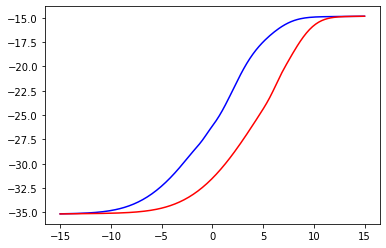

In [318]:
plt.plot(Vbot,F1,'b')
plt.plot(Vtop,F2,'r')

In [204]:
def s_1(b1, b2, Vdc, b7, b5):
    s1 = (b1+b2)/2 + ((b2-b1)/2)*special.erfc((Vdc-b7)/b5)
    return s1
    
def s_2(b3, b4, Vdc, b8, b6):
    s2 = (b3+b4)/2 + ((b4-b3)/2)*special.erfc((Vdc-b8)/b6)
    return s2

def F_1(a1, a2, a3, Vdc, Ec_, s1):
    F1 = (a1+a2)/2 + (a2-a1)*special.erfc((Vdc-Ec_)/s1) + a3*Vdc
    return F1

def F_2(a1, a2, a3, Vdc, Ec, s2):
    F2 = (a1+a2)/2 + (a2-a1)*special.erfc((Vdc-Ec)/s2) + a3*Vdc
    return F2
    

In [265]:
b1 = 1
b2 = 2.2
b3 = 1
b4 = 3.5
b5 = 5
b6 = 5
b7 = 5
b8 = 5
Vdc = np.linspace(-10,10,100)
Ec_ = -5
Ec = 5
a1 = 1
a2 = 0
a3 = 0.01

In [266]:
s1 = s_1(b1, b2, Vdc, b7, b5)
s2 = s_2(b3, b4, Vdc, b8, b6)

In [267]:
F1 = F_1(a1, a2, a3, Vdc, Ec_, s1)
F2 = F_2(a1, a2, a3, Vdc, Ec, s2)

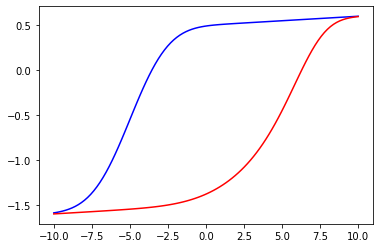

In [268]:
plt.plot(Vdc,F1,'b')
plt.plot(Vdc,F2,'r')

In [38]:
TIME_STEP = 10
INPUT_SIZE = 1
LR = 0.01

In [39]:
x = np.linspace(0,1,100,dtype = np.float32)

In [40]:
steps = np.linspace(0, np.pi*2, 100, dtype=np.float32)
x_np = np.sin(steps)
y_np = np.cos(steps)

In [41]:
class RNN(nn.Module):
    def __init__(self):
        super(RNN,self).__init__()
        
        self.rnn = nn.RNN(
            input_size = INPUT_SIZE,
            hidden_size = 32,
            num_layers = 1,
            batch_first = True,   
        )
        
        self.out = nn.Linear(32,1)

    def forward(self, x, h_state):
        r_out, h_state = self.rnn(x, h_state)
        outs = []
        for time_step in range(r_out.size(1)):
            outs.append(self.out(r_out[:,time_step,:]))
        return torch.stack(outs, dim=1), h_state
    

In [42]:
rnn = RNN()
rnn

RNN(
  (rnn): RNN(1, 32, batch_first=True)
  (out): Linear(in_features=32, out_features=1, bias=True)
)

In [43]:
optimizer = torch.optim.Adam(rnn.parameters(),lr=LR)
loss_func = nn.MSELoss()

In [44]:
h_state = None

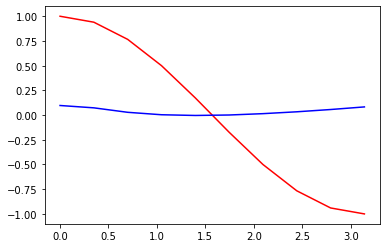

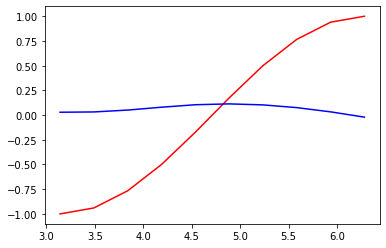

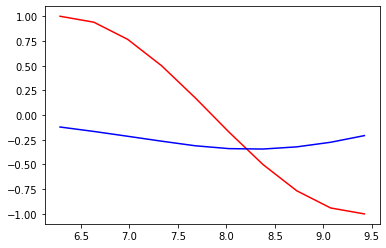

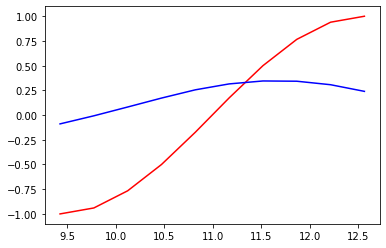

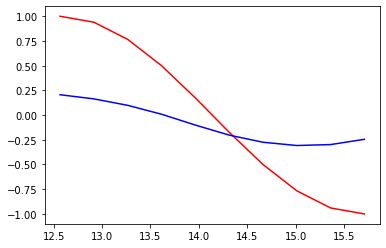

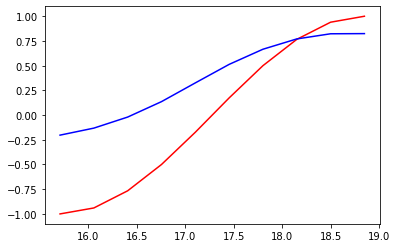

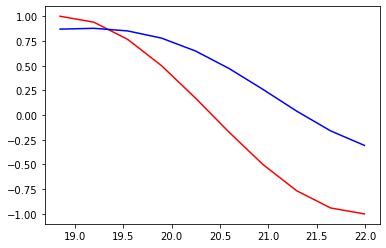

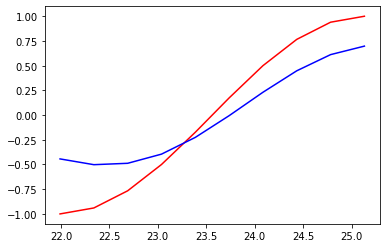

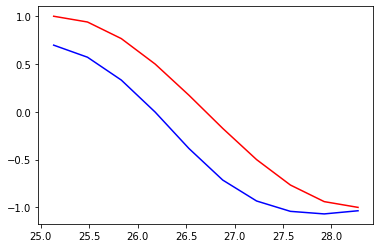

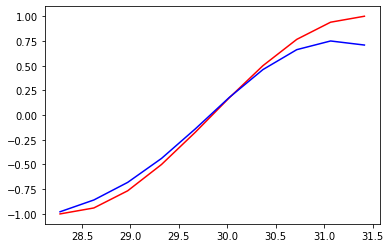

In [45]:
for step in range(10):
    start, end = step*np.pi, (step+1)*np.pi
    steps = np.linspace(start, end, TIME_STEP, dtype=np.float32)
    x_np = np.sin(steps)
    y_np = np.cos(steps)
    
    x = Variable(torch.from_numpy(x_np[np.newaxis, :, np.newaxis]))
    y = Variable(torch.from_numpy(y_np[np.newaxis, :, np.newaxis]))
    
    prediction, h_state = rnn(x, h_state)
    h_state = Variable(h_state.data)
    
    loss = loss_func(prediction, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    plt.plot(steps, y_np.flatten(), 'r-')
    plt.plot(steps, prediction.data.numpy().flatten(),'b-')
    plt.draw(); plt.pause(0.05)
